In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer/Edureka_Consumer_Complaints_train.csv
/kaggle/input/consumer/Edureka_Consumer_Complaints_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_df=pd.read_csv("/kaggle/input/consumer/Edureka_Consumer_Complaints_test.csv")
train_df=pd.read_csv("/kaggle/input/consumer/Edureka_Consumer_Complaints_train.csv")

# Step1: As we need to predict "Product" from "Consumer complaint narrative", hence selecting those two columns only.

In [3]:
text_test_df=test_df[["Consumer complaint narrative","Product"]]
text_train_df=train_df[["Consumer complaint narrative","Product"]]

# Step2: Checking for the shape of the dataset and the null values per column.

In [4]:
##Checking for Test
print("------Test------\n")
print("Shape:",text_test_df.shape)
print("Null values per column:")
print(text_test_df.isnull().sum())
##Checking for Train
print("------Train-------\n")
print("Shape:",text_train_df.shape)
print("Null values per column:")
print(text_train_df.isnull().sum())

------Test------

Shape: (119606, 2)
Null values per column:
Consumer complaint narrative    100692
Product                              0
dtype: int64
------Train-------

Shape: (358810, 2)
Null values per column:
Consumer complaint narrative    302630
Product                              0
dtype: int64


* **As from the attained result we can infer "Product" column has no null value, in both, test and train dataset whereas,for "Consumer complaint narrative" column has 3lakh entries are missing out of 3.58lakh entries in train dataset and 1lakh out of 1.19lakh missing entries in test dataset.**

# Step3: Taking non null values

In [5]:
new_test_df=text_test_df[pd.notnull(text_test_df["Consumer complaint narrative"])].reset_index().drop("index",axis=1)
new_train_df=text_train_df[pd.notnull(text_train_df["Consumer complaint narrative"])].reset_index().drop("index",axis=1)
print("Test:",new_test_df.isnull().sum().sum())
print("Train:",new_train_df.isnull().sum().sum())

Test: 0
Train: 0


* **The output confirms "new_test_df" and "new_train_df" has zero null entries.**

# Step4: Check the Text description column, "Consumer complaint narrative"

In [6]:
new_train_df.head()["Consumer complaint narrative"]

0    RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...
1    Homeowner applied for 2nd modification due to ...
2    In XXXX I started service with a cable company...
3    I went into a XXXX dealership and was told I w...
4    When requested, Portfolio Recovery Services ( ...
Name: Consumer complaint narrative, dtype: object

In [7]:
new_test_df.head()["Consumer complaint narrative"]

0    I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...
1    I have asked One Main Financial not to call my...
2    I have received several calls from a XXXX XXXX...
3    I have contacted Experian and told them to rem...
4    The bank obtained the property through a forec...
Name: Consumer complaint narrative, dtype: object

* **From the output it is obvious, that the text needs cleaning as cleaning the text data will improve NLP result.**

# Step5: Text Cleaning 

# *1. Lowercasing : Converting the text to lower case is imporatant as "apple" and "APPLE" are treated differently in the vector space.*

In [8]:
new_train_df["Consumer complaint narrative"]=new_train_df["Consumer complaint narrative"].apply(lambda x: str(x).lower())
new_test_df["Consumer complaint narrative"]=new_test_df["Consumer complaint narrative"].apply(lambda x: str(x).lower())

In [9]:
print("------Train-------\n")
print(new_train_df.head(3)["Consumer complaint narrative"])
print("------Test------\n")
print(new_test_df.head(3)["Consumer complaint narrative"])

------Train-------

0    re : xxxx xxxx xxxx-privileged and confidentia...
1    homeowner applied for 2nd modification due to ...
2    in xxxx i started service with a cable company...
Name: Consumer complaint narrative, dtype: object
------Test------

0    i want to request a credit line increase of xx...
1    i have asked one main financial not to call my...
2    i have received several calls from a xxxx xxxx...
Name: Consumer complaint narrative, dtype: object


# 2. Removing punctuations,html characters

In [10]:
import re
new_train_df["Consumer complaint narrative"]=new_train_df["Consumer complaint narrative"].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",x)) 
new_test_df["Consumer complaint narrative"]=new_test_df["Consumer complaint narrative"].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?","",x))

In [11]:
print("------Train-------\n")
print(new_train_df.iloc[1]["Consumer complaint narrative"])
print("------Test------\n")
print(new_test_df.iloc[1]["Consumer complaint narrative"])

------Train-------

homeowner applied for 2nd modification due to reset of first modification which caused a payment increase at the time of the application she was not delinquent homeowner was approved for 2nd fixed rate modification for the life of the loan all payments were made on the trial but after receiving permanent agreement the deferred principal amount from 1st modification increased by xxxx housing counselor had several calls set up with ocwen to clarify difference in deferred principal amount homeowner was told several times not to send in permanent mod until dispute was resolved after the homeowner finally understood the permanent mod she was told that she was 5 months delinquent with a total of xxxx ocwen is not accepting payments or 2nd modification 
------Test------

i have asked one main financial not to call my place of employment and yet they have on three separate occasions the most recent was on xxxxxxxx2016 when my coworker again informed them that i could not re

# 3. Removing xxx* characters

In [12]:
new_train_df["Consumer complaint narrative"]=new_train_df["Consumer complaint narrative"].apply(lambda l: re.sub(r"xx*","",l)) 
new_test_df["Consumer complaint narrative"]=new_test_df["Consumer complaint narrative"].apply(lambda l: re.sub(r"xx*","",l))

In [13]:
print("------Train-------\n")
print(new_train_df.iloc[1]["Consumer complaint narrative"])
print("------Test------\n")
print(new_test_df.iloc[1]["Consumer complaint narrative"])

------Train-------

homeowner applied for 2nd modification due to reset of first modification which caused a payment increase at the time of the application she was not delinquent homeowner was approved for 2nd fied rate modification for the life of the loan all payments were made on the trial but after receiving permanent agreement the deferred principal amount from 1st modification increased by  housing counselor had several calls set up with ocwen to clarify difference in deferred principal amount homeowner was told several times not to send in permanent mod until dispute was resolved after the homeowner finally understood the permanent mod she was told that she was 5 months delinquent with a total of  ocwen is not accepting payments or 2nd modification 
------Test------

i have asked one main financial not to call my place of employment and yet they have on three separate occasions the most recent was on 2016 when my coworker again informed them that i could not receive calls at wo

# 4. Removing unwanted space

In [14]:
new_train_df["Consumer complaint narrative"]=new_train_df["Consumer complaint narrative"].apply(lambda l: re.sub(r"\s+"," ",l)) 
new_test_df["Consumer complaint narrative"]=new_test_df["Consumer complaint narrative"].apply(lambda l: re.sub(r"\s+"," ",l))

In [15]:
print("------Train-------\n")
print(new_train_df.iloc[1]["Consumer complaint narrative"])
print("------Test------\n")
print(new_test_df.iloc[1]["Consumer complaint narrative"])

------Train-------

homeowner applied for 2nd modification due to reset of first modification which caused a payment increase at the time of the application she was not delinquent homeowner was approved for 2nd fied rate modification for the life of the loan all payments were made on the trial but after receiving permanent agreement the deferred principal amount from 1st modification increased by housing counselor had several calls set up with ocwen to clarify difference in deferred principal amount homeowner was told several times not to send in permanent mod until dispute was resolved after the homeowner finally understood the permanent mod she was told that she was 5 months delinquent with a total of ocwen is not accepting payments or 2nd modification 
------Test------

i have asked one main financial not to call my place of employment and yet they have on three separate occasions the most recent was on 2016 when my coworker again informed them that i could not receive calls at work

In [16]:
print("------Train-------\n")
print(new_train_df.head())
print("------Test------\n")
print(new_test_df.head())

------Train-------

                        Consumer complaint narrative                  Product
0  re privileged and confidential informationdear...  Bank account or service
1  homeowner applied for 2nd modification due to ...                 Mortgage
2  in i started service with a cable company name...          Debt collection
3  i went into a dealership and was told i would ...            Consumer Loan
4  when requested portfolio recovery services prs...          Debt collection
------Test------

                        Consumer complaint narrative           Product
0  i want to request a credit line increase of i ...       Credit card
1  i have asked one main financial not to call my...     Consumer Loan
2  i have received several calls from a at summit...   Debt collection
3  i have contacted eperian and told them to remo...  Credit reporting
4  the bank obtained the property through a forec...          Mortgage


* **Hence the text seems clean now.**

# Step6: Check on Product

# 1. No of unique categories in Product.

In [17]:
print("------Train-------\n")
print("No of Categories in Product :",new_train_df["Product"].nunique())
print("------Test------\n")
print("No of Categories in Product :",new_test_df["Product"].nunique())

------Train-------

No of Categories in Product : 12
------Test------

No of Categories in Product : 12


# 2.Check for the categories availability: if same are present in train and test dataset and list the extras

In [18]:
train_product=new_train_df["Product"].unique().tolist()
test_product=new_test_df["Product"].unique().tolist()

not_available_in_test=[]
for prod in train_product:
    if prod in test_product:
        pass
    else:
        not_available_in_test.append(prod)

not_available_in_train=[]
for prod in test_product:
    if prod in train_product:
        pass
    else:
        not_available_in_train.append(prod)
        
if(len(not_available_in_test)==0 and len(not_available_in_train)==0):
    print("All categories of the test dataset is there in the train dataset")
elif(len(not_available_in_test)>0 and len(not_available_in_train)==0):
    print("All test categories are present in train but there are few categories of train unavailable in test ")
    print(not_available_in_test)
elif(len(not_available_in_test)==0 and len(not_available_in_train)>0):
    print("All train categories are present in test but there are few categories of test unavailable in train ")
    print(not_available_in_train)
elif(len(not_available_in_test)>0 and len(not_available_in_train)>0):
    print("There are few categories unavailable in both")
    print("Extra categories of test",not_available_in_train)
    print("Extra categories of train",not_available_in_test)
    

All categories of the test dataset is there in the train dataset


# 3.Check if the train dataset is balanced?

In [19]:
new_train_df["Product"].value_counts()

Debt collection            14402
Mortgage                   12244
Credit reporting           10670
Credit card                 6659
Bank account or service     4875
Consumer Loan               3104
Student loan                2371
Prepaid card                 608
Payday loan                  604
Money transfers              543
Other financial service       96
Virtual currency               4
Name: Product, dtype: int64

*** From the result it's clear data is highly imbalance**

# Step7: Split the data into train and test

In [20]:
x_train=new_train_df["Consumer complaint narrative"]
y_train=new_train_df["Product"]
x_test=new_test_df["Consumer complaint narrative"]
y_test=new_test_df["Product"]

# Step8: Split the text into tokens and generate Tfidf vectors

In [21]:
from nltk.tokenize import word_tokenize

def tokenizer_word(text):
    tokens=word_tokenize(text)
    return(tokens)

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(analyzer="word",tokenizer=tokenizer_word,lowercase=True,stop_words={'english'})
x_train_tfidf=tf.fit_transform(x_train)
x_test_tfidf=tf.transform(x_test)
print("train",x_train_tfidf.shape)
print("test",x_test_tfidf.shape)

train (56180, 57022)
test (18914, 57022)


# Step9: Find which model gives better result

In [23]:
##Findout which model performs better
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models=[LogisticRegression(max_iter=2000),RandomForestClassifier(),MultinomialNB(),LinearSVC(max_iter=3000),XGBClassifier()]
for i in models:
    obj=i
    obj.fit(x_train_tfidf,y_train)
    pred=obj.predict(x_test_tfidf)
    result=accuracy_score(y_test,pred)
    print("Accuracy of",i,"is : ",result)

Accuracy of LogisticRegression(max_iter=2000) is :  0.8540234746748441
Accuracy of RandomForestClassifier() is :  0.7831764830284446
Accuracy of MultinomialNB() is :  0.6678122026012477
Accuracy of LinearSVC(max_iter=3000) is :  0.8570371153642804
Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is :  0.8502167706460823


* **As per the attained results LinearSVC,XGBClassifier followed by LogisticRegression out performed among all.**

# Step10: Developing LinearSVC model

In [25]:
##Implementing LinearSVC
svc=LinearSVC(C=1,penalty="l2",max_iter=3000)
svc.fit(x_train_tfidf,y_train)
prediction=svc.predict(x_test_tfidf)
print("Accuracy of LinearSVC model is",np.round(accuracy_score(y_test,prediction),3))


Accuracy of LinearSVC model is 0.857


# Step11: Generating Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction,target_names=new_test_df["Product"].unique()))

                         precision    recall  f1-score   support

            Credit card       0.83      0.80      0.82      1639
          Consumer Loan       0.78      0.64      0.71      1098
        Debt collection       0.80      0.83      0.81      2159
       Credit reporting       0.89      0.88      0.89      3707
               Mortgage       0.83      0.88      0.85      4732
Other financial service       0.73      0.54      0.62       173
Bank account or service       0.93      0.95      0.94      4216
           Prepaid card       0.00      0.00      0.00        17
           Student loan       0.58      0.32      0.41       199
            Payday loan       0.79      0.70      0.74       213
        Money transfers       0.89      0.82      0.85       758
       Virtual currency       1.00      0.33      0.50         3

               accuracy                           0.86     18914
              macro avg       0.75      0.64      0.68     18914
           weighted avg

# Step12: Generating Confusion Matrix

* **Confusion Matrix will show discrepancies between Actual and Predicted text. If predicted equals actual then its value will only be at the diagonal**

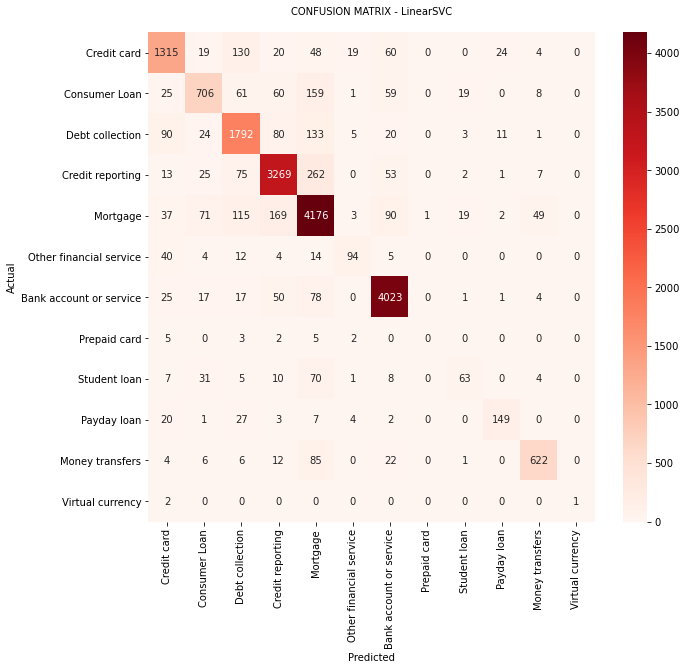

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(cm,annot=True, cmap="Reds",fmt='d',xticklabels=new_test_df["Product"].unique(),yticklabels=new_test_df["Product"].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=10);

* **From the generated confusion matrix, we can say "Credit Reporting,Debit collection and Consumer Loan" was incorrectly classified as "Mortage" to the most followed by "Mortage" as "Credit reporting and Debit collection" then "Credit card" as "Debit Collection".**

In [31]:
#Storing LinearSVC model's prediction to a file
res_dec=pd.Series(prediction)
res_dec.to_csv("/kaggle/working/Consumer_Complaints_prediction.csv")
